In [1]:
#to access kaggle datasets
!pip install kaggle
#Math operations
!pip install numpy==1.15.0
#Machine learning

In [2]:
#data preprocessing
import pandas as pd
#math operations
import numpy as np
#machine learning
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import cv2
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
            
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
import random

Using TensorFlow backend.


In [3]:
# Colab's file access feature
from google.colab import files

#retrieve uploaded file
uploaded = files.upload()

#print results
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [4]:
!kaggle datasets list

ref                                                       title                                              size  lastUpdated          downloadCount  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
dgomonov/new-york-city-airbnb-open-data                   New York City Airbnb Open Data                      2MB  2019-08-12 16:24:45           9290  
lakshyaag/india-trade-data                                India - Trade Data                                  1MB  2019-08-16 16:13:58           5430  
therohk/ireland-historical-news                           The Irish Times - Waxy-Wany News                   47MB  2019-08-24 15:36:54            798  
bradklassen/pga-tour-20102018-data                        PGA Tour Golf Data                                 94MB  2019-08-30 00:09:59           5081  
r3w0p4/bournemouth-venues                                 Venues in Bournemouth         

In [5]:
#download earthquake data, will take 30-60 seconds
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria/downloads/cell-images-for-detecting-malaria.zip/1

100% 337M/337M [00:09<00:00, 38.3MB/s]
100% 337M/337M [00:09<00:00, 36.1MB/s]


In [6]:
#unzip training data for usage, will take about 5 minutes (its big)
!ls
!unzip cell-images-for-detecting-malaria.zip
!ls

cell-images-for-detecting-malaria.zip  sample_data
Archive:  cell-images-for-detecting-malaria.zip
   creating: cell_images/
   creating: cell_images/Parasitized/
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_169.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_170.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_ce

In [0]:
PARA_DIR = "cell_images/Parasitized/"
UNIF_DIR =  "cell_images/Uninfected/"

In [0]:
Pimages = os.listdir(PARA_DIR)
Nimages = os.listdir(UNIF_DIR)

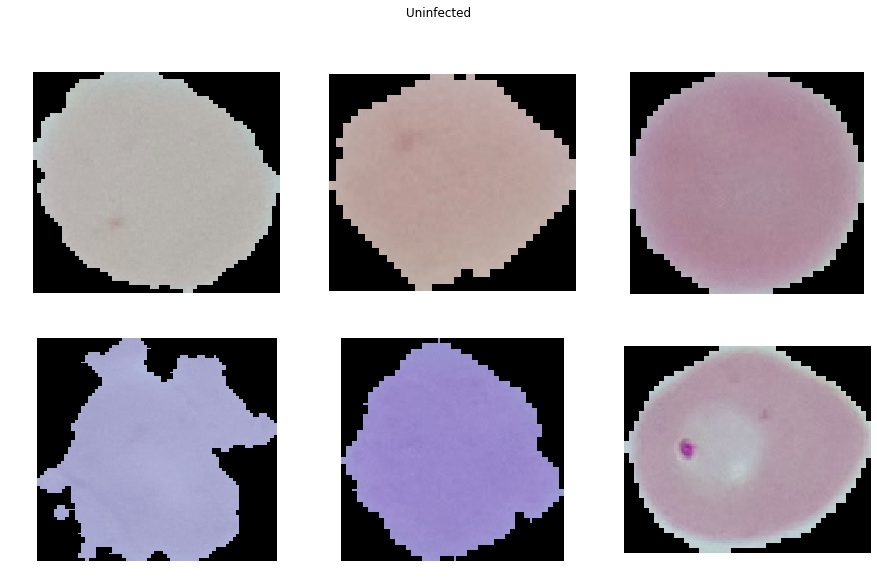

In [9]:
sample_normal = random.sample(Nimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('cell_images/Uninfected/'+sample_normal[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Uninfected')
plt.show()

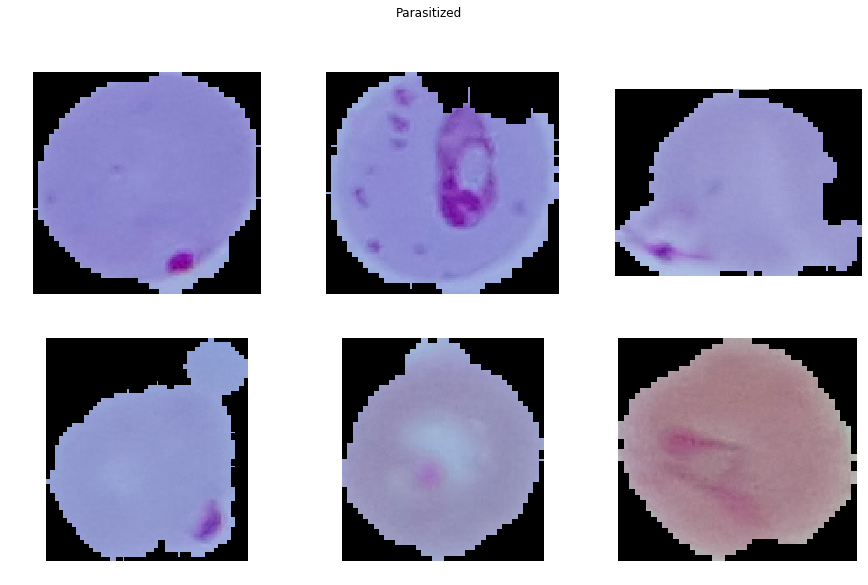

In [10]:
sample_parasite = random.sample(Pimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('cell_images/Parasitized/'+sample_parasite[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Parasitized')
plt.show()

In [11]:
data=[]
labels=[]
Parasitized=os.listdir("cell_images/Parasitized/")
for a in Parasitized:
    try:
        image=cv2.imread("cell_images/Parasitized/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir("cell_images/Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread("cell_images/Uninfected/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

In [0]:
Cells=np.array(data)
labels=np.array(labels)

In [0]:
np.save("Cells",Cells)
np.save("labels",labels)

In [0]:
Cells=np.load("Cells.npy")
labels=np.load("labels.npy")

In [0]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [0]:
num_classes=len(np.unique(labels))
len_data=len(Cells)

In [0]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [0]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [0]:
#Doing One hot encoding as classifier has multiple classes
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Set random seed
np.random.seed(0)

In [21]:
#creating sequential model
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         


In [22]:
# compile the model with loss as categorical_crossentropy and using adam optimizer you can test result by trying RMSProp as well as Momentum
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

In [24]:
#Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
h=model.fit(x_train,y_train,batch_size=32,callbacks=callbacks, validation_data=(x_test,y_test),epochs=20,verbose=1)

Train on 24803 samples, validate on 2755 samples
Epoch 1/20
24803/24803 [==============================] - 16s 634us/step - loss: 0.3904 - acc: 0.8049 - val_loss: 0.1509 - val_acc: 0.9546
Epoch 2/20
24803/24803 [==============================] - 9s 381us/step - loss: 0.1755 - acc: 0.9445 - val_loss: 0.1406 - val_acc: 0.9564
Epoch 3/20
24803/24803 [==============================] - 9s 370us/step - loss: 0.1624 - acc: 0.9496 - val_loss: 0.1399 - val_acc: 0.9583
Epoch 4/20
24803/24803 [==============================] - 9s 371us/step - loss: 0.1523 - acc: 0.9527 - val_loss: 0.1277 - val_acc: 0.9608
Epoch 5/20
24803/24803 [==============================] - 9s 373us/step - loss: 0.1449 - acc: 0.9541 - val_loss: 0.1196 - val_acc: 0.9626
Epoch 6/20
24803/24803 [==============================] - 9s 370us/step - loss: 0.1418 - acc: 0.9541 - val_loss: 0.1172 - val_acc: 0.9633
Epoch 7/20
24803/24803 [==============================] - 9s 373us/step - loss: 0.1361 - acc: 0.9554 - val_loss: 0.1130 - 

In [0]:
from numpy import loadtxt
from keras.models import load_model
model = load_model('.mdl_wts.hdf5')

In [0]:
score=model.evaluate(x_test,y_test)
print(score)

2755/2755 [==============================] - 0s 127us/step
[0.1328830818349864, 0.9586206896551724]


In [0]:
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

2755/2755 [==============================] - 0s 87us/step

 Test_Accuracy:- 0.9586206896551724


In [0]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

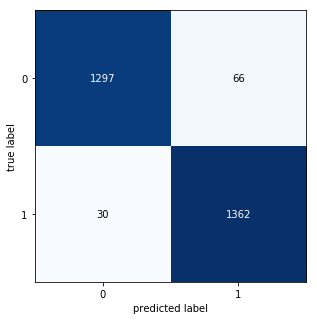

In [26]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [0]:
i=9
pred = model.predict(x_test,batch_size=1)
pred = np.argmax(pred,axis = 1)

In [42]:
pred[0]

1

In [0]:
!mkdir models_app

In [0]:
model.save('models_app/my_model.h5')

In [0]:
!zip -r models_app.zip my_model.h5

  adding: my_model.h5 (deflated 9%)


In [0]:
from google.colab import files
files.download('models_app.zip')

In [0]:
len(model.layers)

13

In [0]:
x_test.shape[0]

2755

In [0]:
import keras
print(keras.__version__)

2.2.5


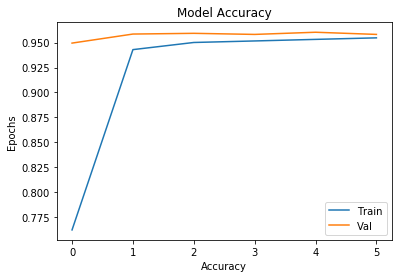

In [0]:
plt.plot(h.history['acc'])
plt.plot(h.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [0]:
fpr_keras, tpr_keras, thresholds = roc_curve(y_true.ravel(), pred.ravel())
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.9584655556822357

In [0]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

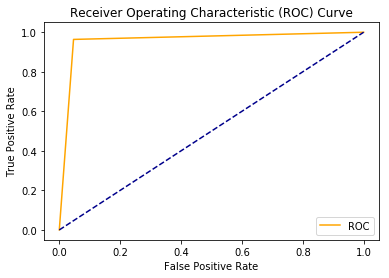

In [0]:
plot_roc_curve(fpr_keras, tpr_keras)

In [0]:
from sklearn.metrics import classification_report

In [0]:


print('{}'.format( 
                           classification_report(y_true , pred)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1432
           1       0.95      0.96      0.96      1323

    accuracy                           0.96      2755
   macro avg       0.96      0.96      0.96      2755
weighted avg       0.96      0.96      0.96      2755



In [0]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
malaria_labels = ['Parasitized','Uninfected']

In [0]:
x_test.shape[0]

2755

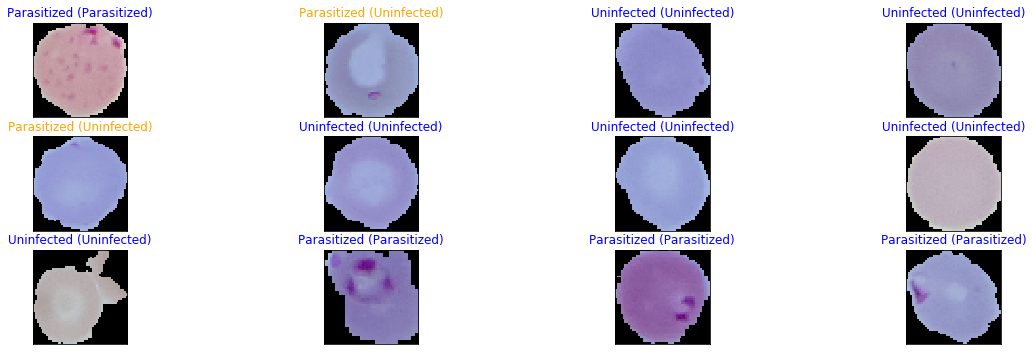

In [0]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=12, replace=False)):
    ax = fig.add_subplot(4,4, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(malaria_labels[pred_idx], malaria_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "orange"))